In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#carregando as tabelas

In [ ]:
tab_calendario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_calendario.csv')

In [ ]:
tab_calendario.dtypes

fk_calendario    int64
ano              int64
dtype: object

In [ ]:
tab_pais = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_pais.csv')

In [ ]:
tab_pais.dtypes

fk_pais_1       int64
nome_pais      object
pais_bloco     object
pais_regiao    object
pais_renda     object
dtype: object

In [ ]:
#renomeando a coluna

In [ ]:
tab_pais = tab_pais.rename (columns = {'fk_pais_1':'fk_pais'})

In [ ]:
tab_pais.dtypes

fk_pais         int64
nome_pais      object
pais_bloco     object
pais_regiao    object
pais_renda     object
dtype: object

In [ ]:
tab_produto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_produto.csv')

In [ ]:
tab_produto.dtypes

fk_produto       int64
nome_produto    object
tipo            object
dtype: object

In [ ]:
tab_setor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_setor.csv')

In [ ]:
tab_setor.dtypes

fk_setor       int64
nome_setor    object
dtype: object

In [ ]:
tab_fato_energia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fato_energia.csv')

In [ ]:
tab_fato_energia.dtypes

id_energia        int64
fk_pais           int64
fk_setor          int64
fk_produto        int64
fk_calendario     int64
valor            object
dtype: object

In [ ]:
tab_fato_populacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fato_populacao.csv')

In [ ]:
tab_fato_populacao.dtypes

pais_bloco        object
fk_pais            int64
fk_calendario      int64
populacao        float64
id_populacao       int64
dtype: object

In [ ]:
#unindo as tabelas

In [ ]:
tab_energia = pd.merge(tab_fato_energia,tab_setor, on = 'fk_setor', how = 'inner')

In [ ]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario        valor  \
0                1        2         9           1              1  1368.251838   
1               13        2         9           2              1  620.7177142   
2               25        2         9           8              1            0   
3               37        2         9           6              1  75.06450081   
4               49        2         9           7              1            0   
...            ...      ...       ...         ...            ...          ...   
222151      222152       43         2           7             51            0   
222152      222153       43         2           9             51     33066.05   
222153      222154        1         2           4             51           ..   
222154      222155        1         2           7             51           ..   
222155      222156        1         2           9             51           ..   

                      nome_

In [ ]:
#Removendo valores não numéricos

In [ ]:
tab_energia = tab_energia[tab_energia['valor'] != '..']

In [ ]:
tab_energia = pd.merge(tab_energia, tab_produto, on = 'fk_produto', how = 'inner')

In [ ]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario        valor  \
0                1        2         9           1              1  1368.251838   
1               97        3         9           1              1  43.48392895   
2              193        4         9           1              1  284.4996793   
3              289        6         9           1              1  396.0110403   
4              385        7         9           1              1  47.31181134   
...            ...      ...       ...         ...            ...          ...   
197880      222141       20         2           9             51     58684.12   
197881      222144       30         2           9             51     7745.183   
197882      222147       36         2           9             51     1444.633   
197883      222150       39         2           9             51    16832.723   
197884      222153       43         2           9             51     33066.05   

                      nome_

In [ ]:
tab_energia.valor = pd.to_numeric(tab_energia.valor, errors = 'coerce')

In [ ]:
tab_energia = pd.merge(tab_energia, tab_pais, on = 'fk_pais', how = 'inner')

In [ ]:
print (tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario  \
0                1        2         9           1              1   
1             4357        2         9           1              2   
2             8713        2         9           1              3   
3            13069        2         9           1              4   
4            17425        2         9           1              5   
...            ...      ...       ...         ...            ...   
197880      204729       43         2           9             47   
197881      209085       43         2           9             48   
197882      213441       43         2           9             49   
197883      217797       43         2           9             50   
197884      222153       43         2           9             51   

               valor                nome_setor              nome_produto tipo  \
0        1368.251838           Production (PJ)  Coal, peat and oil shale  NRW   
1        1648.414248 

In [ ]:
tab_energia = pd.merge(tab_energia, tab_calendario, on = 'fk_calendario', how = 'inner')

In [ ]:
print(tab_energia)

        id_energia  fk_pais  fk_setor  fk_produto  fk_calendario  \
0                1        2         9           1              1   
1                2        2         5           1              1   
2                3        2         4           1              1   
3                4        2        11           1              1   
4                5        2         3           1              1   
...            ...      ...       ...         ...            ...   
196425      217570       43        10           5             50   
196426      217571       43         1           5             50   
196427      217572       43         8           5             50   
196428      217795       43         2           4             50   
196429      217797       43         2           9             50   

                valor                             nome_setor  \
0         1368.251838                        Production (PJ)   
1            0.000000                           Imports

In [ ]:
tab_energia = pd.merge(tab_energia, tab_fato_populacao, on = 'fk_pais', how = 'inner')

In [ ]:
print(tab_energia)

         id_energia  fk_pais  fk_setor  fk_produto  fk_calendario_x  \
0                 1        2         9           1                1   
1                 1        2         9           1                1   
2                 1        2         9           1                1   
3                 1        2         9           1                1   
4                 1        2         9           1                1   
...             ...      ...       ...         ...              ...   
9262870      217797       43         2           9               50   
9262871      217797       43         2           9               50   
9262872      217797       43         2           9               50   
9262873      217797       43         2           9               50   
9262874      217797       43         2           9               50   

                valor                nome_setor              nome_produto  \
0         1368.251838           Production (PJ)  Coal, peat and oil sh

In [ ]:
tab_energia.columns

Index(['id_energia', 'fk_pais', 'fk_setor', 'fk_produto', 'fk_calendario_x',
       'valor', 'nome_setor', 'nome_produto', 'tipo', 'nome_pais',
       'pais_bloco_x', 'pais_regiao', 'pais_renda', 'ano', 'pais_bloco_y',
       'fk_calendario_y', 'populacao', 'id_populacao'],
      dtype='object')

In [ ]:
tab_energia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9262875 entries, 0 to 9262874
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_energia       int64  
 1   fk_pais          int64  
 2   fk_setor         int64  
 3   fk_produto       int64  
 4   fk_calendario_x  int64  
 5   valor            float64
 6   nome_setor       object 
 7   nome_produto     object 
 8   tipo             object 
 9   nome_pais        object 
 10  pais_bloco_x     object 
 11  pais_regiao      object 
 12  pais_renda       object 
 13  ano              int64  
 14  pais_bloco_y     object 
 15  fk_calendario_y  int64  
 16  populacao        float64
 17  id_populacao     int64  
dtypes: float64(2), int64(8), object(8)
memory usage: 1.3+ GB


In [ ]:
#Convertendo para array
eixo_x=tab_energia.iloc[:,13].values
eixo_y=tab_energia.iloc[:,5].values

In [ ]:
eixo_x

array([1971, 1971, 1971, ..., 2020, 2020, 2020])

In [ ]:
eixo_y

array([ 1368.251838,  1368.251838,  1368.251838, ..., 29549.073   ,
       29549.073   , 29549.073   ])

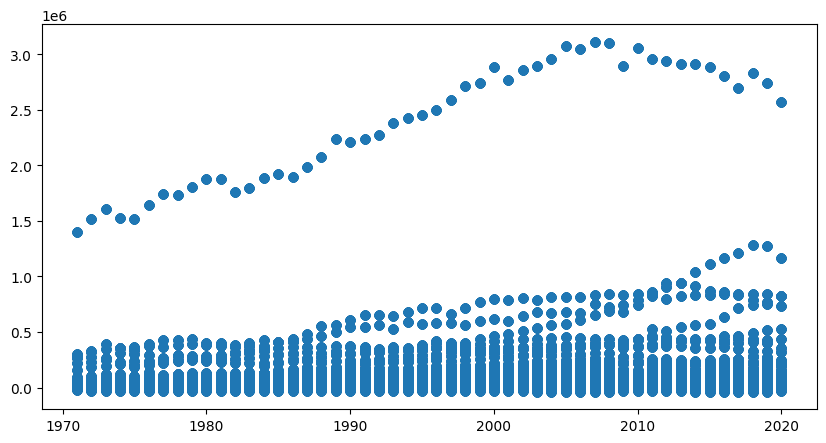

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(eixo_x,eixo_y)

# Nova seção